In [2]:
import keras
from tensorflow import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras import optimizers
import numpy as np
import matplotlib.pyplot as plt

C:\Users\yoshihide\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [3]:
(X_train, y_train), (X_test, y_test)=mnist.load_data()

In [4]:
X_train = X_train.reshape(X_train.shape[0],28,28,1)
X_test=X_test.reshape(X_test.shape[0],28,28,1)
X_train=X_train.astype('float32')/255
X_test=X_test.astype('float32')/255

In [5]:
y_train=keras.utils.to_categorical(y_train, 10)
y_test=keras.utils.to_categorical(y_test, 10)

In [10]:
from keras.layers import BatchNormalization
model = Sequential()
model.add(Conv2D(6, kernel_size=5, strides=1,padding='same', activation='relu', input_shape=(28,28,1)))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(16, kernel_size=3, strides=1, activation='relu'))
model.add(Dropout(0.1))
model.add(BatchNormalization())
model.add(MaxPooling2D(2, strides=2))
 
model.add(Flatten())
model.add(Dense(120, activation='relu'))
model.add(Dense(10, activation='softmax'))

In [11]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 28, 28, 6)         156       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 14, 14, 6)         0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 12, 12, 16)        880       
_________________________________________________________________
dropout_2 (Dropout)          (None, 12, 12, 16)        0         
_________________________________________________________________
batch_normalization_2 (Batch (None, 12, 12, 16)        64        
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 6, 6, 16)          0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 576)               0         
__________

In [12]:
model.compile(loss='categorical_crossentropy',
             optimizer='SGD', metrics=['accuracy'])

In [13]:
history=model.fit(X_train, y_train, epochs=5,
                 validation_data=(X_test, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/5
60000/60000 [==============================] - 255s 4ms/step - loss: 0.1988 - acc: 0.9403 - val_loss: 0.0786 - val_acc: 0.9764
Epoch 2/5
60000/60000 [==============================] - 251s 4ms/step - loss: 0.0771 - acc: 0.9758 - val_loss: 0.0606 - val_acc: 0.9805
Epoch 3/5
60000/60000 [==============================] - 249s 4ms/step - loss: 0.0584 - acc: 0.9823 - val_loss: 0.0474 - val_acc: 0.9838
Epoch 4/5
60000/60000 [==============================] - 244s 4ms/step - loss: 0.0482 - acc: 0.9851 - val_loss: 0.0448 - val_acc: 0.9853
Epoch 5/5
60000/60000 [==============================] - 301s 5ms/step - loss: 0.0432 - acc: 0.9863 - val_loss: 0.0387 - val_acc: 0.9872


In [14]:
test_loss, test_acc=model.evaluate(X_test, y_test)
print('Test accurcy', test_acc)

10000/10000 [==============================] - 32s 3ms/step
Test accurcy 0.9872


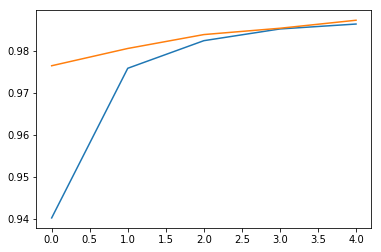

In [15]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.show()